In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('salary_data.csv')

In [30]:
df.head()

,id,role,years_experience,degree,company_size,location,level,salary_mad
0,SAL0000,BI Engineer,8.2,PhD,Mid,Casablanca,Junior,17565.0
1,SAL0001,Product Manager,4.6,Bachelors,Mid,Fes,Junior,16229.0
2,SAL0002,Data Scientist,2.8,Bachelors,Small,Casablanca,Mid,22753.0
3,SAL0003,Data Analyst,4.5,Masters,Small,Rabat,Mid,14296.0
4,SAL0004,QA Engineer,6.7,PhD,Mid,Tangier,Intern,10191.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                200 non-null    object 
 1   role              200 non-null    object 
 2   years_experience  195 non-null    float64
 3   degree            200 non-null    object 
 4   company_size      200 non-null    object 
 5   location          200 non-null    object 
 6   level             200 non-null    object 
 7   salary_mad        196 non-null    float64
dtypes: float64(2), object(6)
memory usage: 12.6+ KB


id doesn’t add predictive power

In [32]:
df = df.drop(columns=['id'])

In [33]:
df.isnull().sum()

,0
role,0
years_experience,5
degree,0
company_size,0
location,0
level,0
salary_mad,4


In [35]:
df['years_experience'] = df.groupby('role')['years_experience'].transform(
    lambda x: x.fillna(x.median())
)

df = df.dropna(subset=['salary_mad'])


In [36]:
df.shape

(196, 7)

In [37]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()


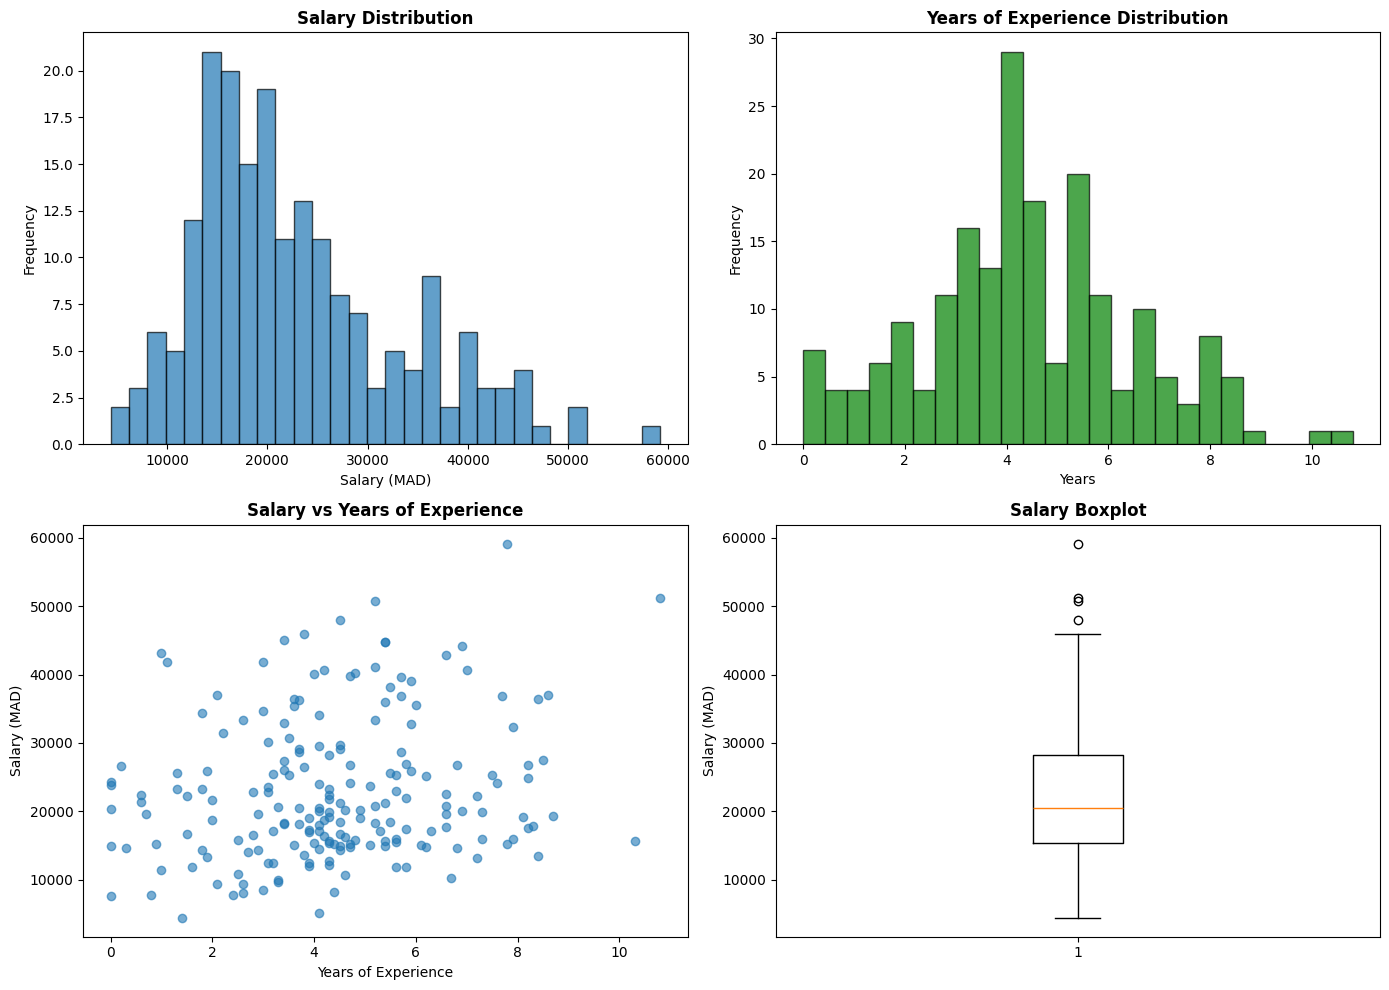

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(df['salary_mad'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Salary Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Salary (MAD)')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df['years_experience'], bins=25, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_title('Years of Experience Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Years')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].scatter(df['years_experience'], df['salary_mad'], alpha=0.6)
axes[1, 0].set_title('Salary vs Years of Experience', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Years of Experience')
axes[1, 0].set_ylabel('Salary (MAD)')

axes[1, 1].boxplot(df['salary_mad'], vert=True)
axes[1, 1].set_title('Salary Boxplot', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Salary (MAD)')

plt.tight_layout()
plt.show()

In [41]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
encoded = ohe.fit_transform(df[['role','degree','company_size','location','level']])
df_encoder = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['role','degree','company_size','location','level']))

Easy, returns a DataFrame of booleans or ints.

In [42]:
df_encoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   role_bi engineer         196 non-null    float64
 1   role_data analyst        196 non-null    float64
 2   role_data engineer       196 non-null    float64
 3   role_data scientist      196 non-null    float64
 4   role_devops engineer     196 non-null    float64
 5   role_frontend developer  196 non-null    float64
 6   role_ml engineer         196 non-null    float64
 7   role_product manager     196 non-null    float64
 8   role_qa engineer         196 non-null    float64
 9   degree_masters           196 non-null    float64
 10  degree_no degree         196 non-null    float64
 11  degree_phd               196 non-null    float64
 12  company_size_large       196 non-null    float64
 13  company_size_mid         196 non-null    float64
 14  company_size_small       1

In [43]:
df_encoder = df_encoder.astype(int)
df_encoder

,role_bi engineer,role_data analyst,role_data engineer,role_data scientist,role_devops engineer,role_frontend developer,role_ml engineer,role_product manager,role_qa engineer,degree_masters,...,location_casablanca,location_fes,location_marrakech,location_rabat,location_remote,location_tangier,level_junior,level_lead,level_mid,level_senior
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
192,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
193,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [44]:
final_df = pd.concat([df[['years_experience', 'salary_mad']].reset_index(drop=True), df_encoder.reset_index(drop=True)], axis=1)

In [45]:
from sklearn.model_selection import train_test_split

X = final_df.drop('salary_mad', axis=1)
y = final_df['salary_mad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.9503535663635565
MSE: 5410579.579842883


In [48]:
y_pred = model.predict(X_test)


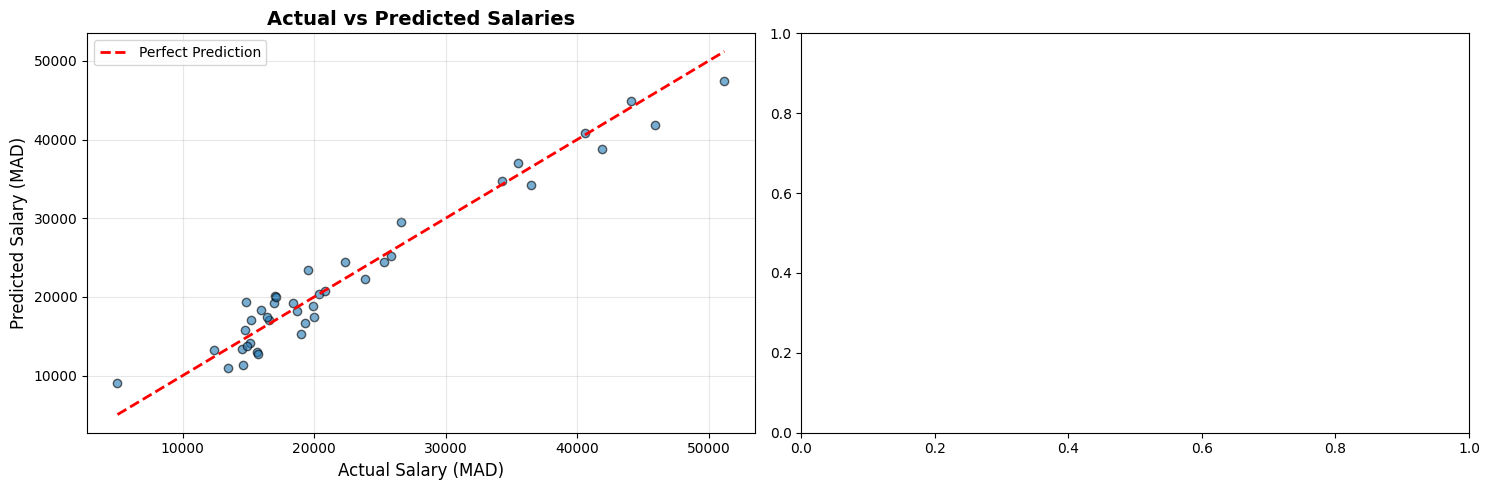


MODEL PERFORMANCE METRICS
R² Score: 0.9504
Mean Squared Error (MSE): 5410579.58
Root Mean Squared Error (RMSE): 2326.07
Mean Absolute Error (MAE): 1960.52

SALARY PREDICTIONS - EXAMPLES

Example 1:
Role: Data Scientist | Experience: 5 years | Degree: Masters
Company: Mid-sized | Location: Casablanca | Level: Mid
Predicted Salary: 27,255.35 MAD


In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

def plot_results(y_test, y_pred):
    """
    Plot actual vs predicted salaries and residuals
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
    axes[0].plot([y_test.min(), y_test.max()],
                 [y_test.min(), y_test.max()],
                 'r--', lw=2, label='Perfect Prediction')
    axes[0].set_xlabel('Actual Salary (MAD)', fontsize=12)
    axes[0].set_ylabel('Predicted Salary (MAD)', fontsize=12)
    axes[0].set_title('Actual vs Predicted Salaries', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


    print("\n" + "="*50)
    print("MODEL PERFORMANCE METRICS")
    print("="*50)
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print("="*50)

def predict_salary(model, ohe, years_exp, role, degree, company_size, location, level):
    """
    Predict salary for a given set of features

    Parameters:
    -----------
    model : trained model
    ohe : fitted OneHotEncoder
    years_exp : float - years of experience
    role : str - job role
    degree : str - education level
    company_size : str - company size
    location : str - location
    level : str - seniority level

    Returns:
    --------
    predicted salary
    """
    input_data = pd.DataFrame({
        'role': [role.lower()],
        'degree': [degree.lower()],
        'company_size': [company_size.lower()],
        'location': [location.lower()],
        'level': [level.lower()]
    })

    encoded = ohe.transform(input_data)
    encoded_df = pd.DataFrame(
        encoded,
        columns=ohe.get_feature_names_out(['role','degree','company_size','location','level'])
    )
    encoded_df.insert(0, 'years_experience', years_exp)

    prediction = model.predict(encoded_df)[0]

    return prediction
plot_results(y_test, y_pred)

print("\n" + "="*50)
print("SALARY PREDICTIONS - EXAMPLES")
print("="*50)

pred1 = predict_salary(
    model, ohe,
    years_exp=5.0,
    role='Data Scientist',
    degree='Masters',
    company_size='Mid',
    location='Casablanca',
    level='Mid'
)
print(f"\nExample 1:")
print(f"Role: Data Scientist | Experience: 5 years | Degree: Masters")
print(f"Company: Mid-sized | Location: Casablanca | Level: Mid")
print(f"Predicted Salary: {pred1:,.2f} MAD")



In [50]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)